Importing necessary python packsages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data to a pandas dataframe

In [2]:
df = pd.read_excel('iris (1).xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Checking for the information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking for null values

In [5]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Checking for the distribution of the data

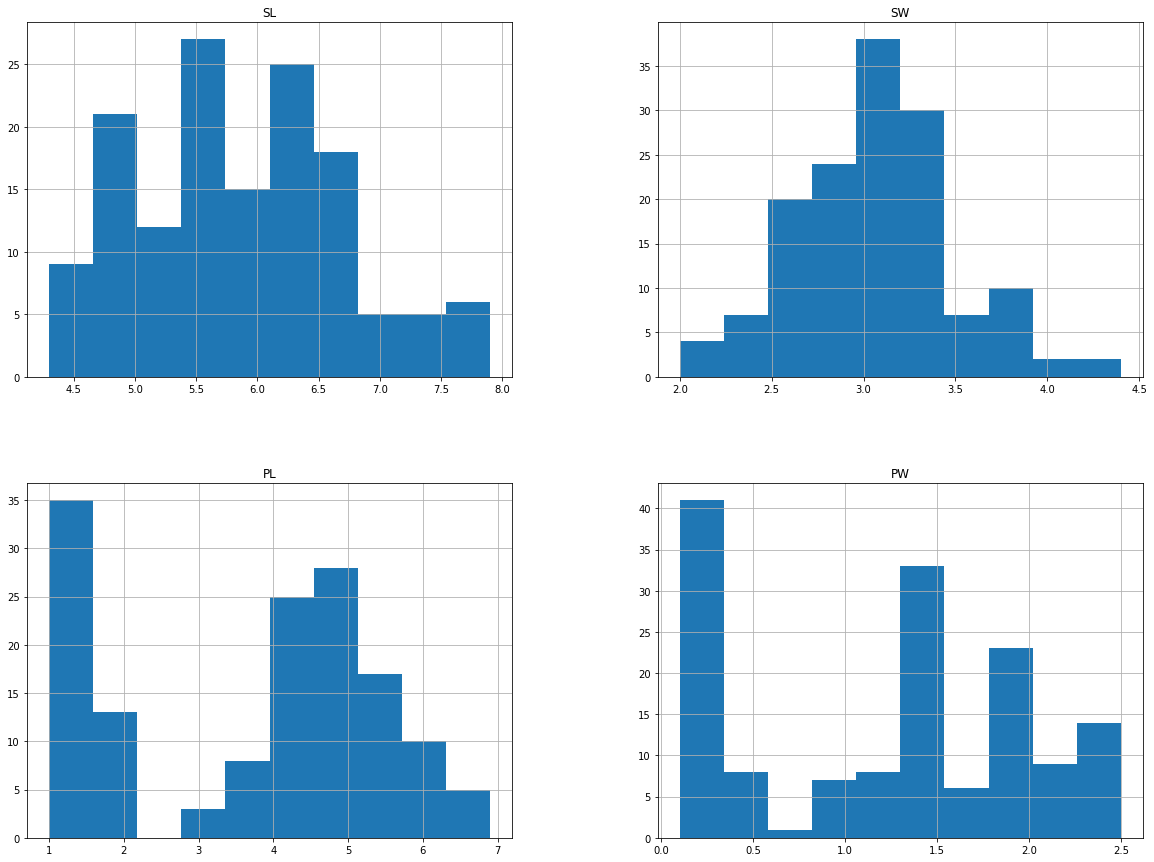

In [6]:
freqgraph  = df.select_dtypes(include = 'float')
freqgraph.hist(figsize = (20,15))
plt.show()

In [7]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

Removing null values

In [8]:
df['SL'] = round(df['SL'].fillna(df['SL'].mean()),1)
df['SW'] = round(df['SW'].fillna(df['SW'].mean()),1)
df['PL'] = round(df['PL'].fillna(df['PL'].median()),1)

In [9]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Encoding the target variable 'Classification'

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['Classification'] = le.fit_transform(df['Classification'])

In [12]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.9,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Assigning each column to it's appropriate variable


In [13]:
x = df.drop(['Classification'], axis = 1)
y = df['Classification']

Splitting the data into train and test

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

Creating Logistic Regression model


In [22]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver = 'lbfgs', max_iter = 500000)
log_model = log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

Printing the model predicted values for variable y

In [23]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

Printing the actual values of variable y

In [24]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Classification, dtype: int64

Checking how good the model is ?

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [30]:
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  1.0


Creating kNN model

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Creating an empty list and giving values 3 to 14 to the variable 'neighbors'

In [32]:
metric_k = []
neighbors = np.arange(3,15)

In [33]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_predictions = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_predictions)
  metric_k.append(acc)

Printing the values for the list metric_k which contains the accuracy score

In [34]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Plotting k against accuracy scores

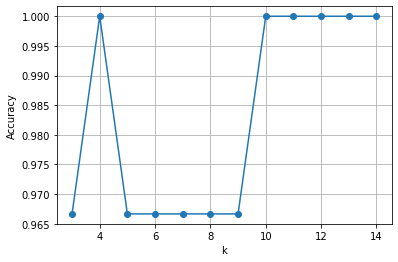

In [35]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

Putting the value of k=8 where accuracy is 100%

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [37]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [38]:
print('Accuracy = ', accuracy_score(y_test,y_predictions))


Accuracy =  0.9666666666666667


Creating SVM model

In [39]:
from sklearn.svm import SVC

In [40]:
svm_cls = SVC(kernel = 'linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_pred_svm = svm_cls.predict(x_test)

Checking for how good the SVM model is

In [41]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [42]:
accuracy_score(y_test,y_pred_svm)

1.0

Creating SVM model with rbf as the kernel

In [43]:
svm1_cls = SVC(kernel = 'rbf')
svm1_cls = svm1_cls.fit(x_train,y_train)
y_pred_svm1 = svm1_cls.predict(x_test)

In [44]:
confusion_matrix(y_test,y_pred_svm1)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [45]:
accuracy_score(y_test,y_pred_svm1)

1.0

Creating a Decision Tree model

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(x_train,y_train)
y_pred_dt = dt_cls.predict(x_test)

In [47]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [48]:
accuracy_score(y_test,y_pred_dt)

1.0

Creating a Random Forest model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)
y_pred_rf = rf_cls.predict(x_test)

In [50]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [51]:
accuracy_score(y_test,y_pred_rf)

1.0

The accuracy score for Logistic Regression(LR), SVM, Decision Tree (DT) and Random Forest (RF) models is 100%, whereas in case of kNN it is 97%. Hence for this dataset the LR, SVM, DT and RF models outperforms kNN.